# Machine Learning for the Detection of Network Attacks

Kyra Mozley, Part II Computer Science, Univeristy of Cambridge 

I will perform, and analyse the following 5 machine learning algorithms on the [CICIDS 2017 Dataset](https://www.unb.ca/cic/datasets/ids-2017.html): 

- Support Vector Machine (SVM)
- Decision Tree
- Naive Bayes
- K Means Cluster 
- K Nearest Neighbours

First, I will prepare the dataset, making sure it is the right shape and there are no null values. Next I will perform feature selection, using a filter approach. Lastly, I will then train and test the different models.

[1]: Iman Sharafaldin, Arash Habibi Lashkari, and Ali A. Ghorbani, “Toward Generating a New Intrusion Detection Dataset and Intrusion Traffic Characterization”, 4th International Conference on Information Systems Security and Privacy (ICISSP), Portugal, January 2018

# Imports

In [55]:
# import required libraries 
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn
import time

from numpy import array

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import completeness_score, homogeneity_score, v_measure_score

from sklearn.model_selection import train_test_split

# Reading in Data

The implemented attacks include Brute Force FTP, Brute Force SSH, DoS, Heartbleed, Web Attack, Infiltration, Botnet and DDoS. They have been executed both morning and afternoon on Tuesday, Wednesday, Thursday and Friday.

Day, Date, Description, Size (GB)

- Monday, Normal Activity, 11.0G
- Tuesday, attacks + Normal Activity, 11G
- Wednesday, attacks + Normal Activity, 13G
- Thursday, attacks + Normal Activity, 7.8G
- Friday, attacks + Normal Activity, 8.3G

They have split the csv into 8 different files (for the different days), so need to combine these. 

In [56]:
path = 'ids/MachineLearningCVE'
all_files = glob.glob(path + "/*.csv")
dataset = pd.concat((pd.read_csv(f) for f in all_files))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  This is separate from the ipykernel package so we can avoid doing imports until


Column names from the dataset

In [57]:
col_names = ["Destination_Port",
             "Flow_Duration", 
             "Total_Fwd_Packets",
             "Total_Backward_Packets",
             "Total_Length_of_Fwd_Packets", 
             "Total_Length_of_Bwd_Packets", 
             "Fwd_Packet_Length_Max", 
             "Fwd_Packet_Length_Min", 
             "Fwd_Packet_Length_Mean", 
             "Fwd_Packet_Length_Std",
             "Bwd_Packet_Length_Max", 
             "Bwd_Packet_Length_Min", 
             "Bwd_Packet_Length_Mean", 
             "Bwd_Packet_Length_Std",
             "Flow_Bytes_s", 
             "Flow_Packets_s", 
             "Flow_IAT_Mean", 
             "Flow_IAT_Std", 
             "Flow_IAT_Max", 
             "Flow_IAT_Min",
             "Fwd_IAT_Total", 
             "Fwd_IAT_Mean", 
             "Fwd_IAT_Std", 
             "Fwd_IAT_Max", 
             "Fwd_IAT_Min",
             "Bwd_IAT_Total", 
             "Bwd_IAT_Mean", 
             "Bwd_IAT_Std", 
             "Bwd_IAT_Max", 
             "Bwd_IAT_Min",
             "Fwd_PSH_Flags", 
             "Bwd_PSH_Flags", 
             "Fwd_URG_Flags", 
             "Bwd_URG_Flags", 
             "Fwd_Header_Length", 
             "Bwd_Header_Length",
             "Fwd_Packets_s", 
             "Bwd_Packets_s", 
             "Min_Packet_Length", 
             "Max_Packet_Length", 
             "Packet_Length_Mean", 
             "Packet_Length_Std", 
             "Packet_Length_Variance",
             "FIN_Flag_Count", 
             "SYN_Flag_Count", 
             "RST_Flag_Count", 
             "PSH_Flag_Count", 
             "ACK_Flag_Count", 
             "URG_Flag_Count", 
             "CWE_Flag_Count", 
             "ECE_Flag_Count", 
             "Down_Up_Ratio", 
             "Average_Packet_Size", 
             "Avg_Fwd_Segment_Size", 
             "Avg_Bwd_Segment_Size", 
             "Fwd_Header_Length",
             "Fwd_Avg_Bytes_Bulk", 
             "Fwd_Avg_Packets_Bulk", 
             "Fwd_Avg_Bulk_Rate", 
             "Bwd_Avg_Bytes_Bulk", 
             "Bwd_Avg_Packets_Bulk",
             "Bwd_Avg_Bulk_Rate",
             "Subflow_Fwd_Packets", 
             "Subflow_Fwd_Bytes", 
             "Subflow_Bwd_Packets", 
             "Subflow_Bwd_Bytes",
             "Init_Win_bytes_forward", 
             "Init_Win_bytes_backward", 
             "act_data_pkt_fwd", 
             "min_seg_size_forward",
             "Active_Mean", 
             "Active_Std", 
             "Active_Max", 
             "Active_Min",
             "Idle_Mean", 
             "Idle_Std", 
             "Idle_Max", 
             "Idle_Min", 
             "Label"
            ]

Inspect the Dataset

In [4]:
dataset.columns = col_names
dataset.head(5)

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,22,166,1,1,0,0,0,0,0.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
1,60148,83,1,2,0,0,0,0,0.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
2,123,99947,1,1,48,48,48,48,48.0,0.0,...,40,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
3,123,37017,1,1,48,48,48,48,48.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
4,0,111161336,147,0,0,0,0,0,0.0,0.0,...,0,1753752.625,2123197.578,4822992,95,9463032.7,2657727.996,13600000,5700287,BENIGN


In [5]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Destination_Port,2830743.0,8.071483e+03,1.828363e+04,0.000000e+00,53.000000,80.000000,4.430000e+02,6.553500e+04
Flow_Duration,2830743.0,1.478566e+07,3.365374e+07,-1.300000e+01,155.000000,31316.000000,3.204828e+06,1.200000e+08
Total_Fwd_Packets,2830743.0,9.361160e+00,7.496728e+02,1.000000e+00,2.000000,2.000000,5.000000e+00,2.197590e+05
Total_Backward_Packets,2830743.0,1.039377e+01,9.973883e+02,0.000000e+00,1.000000,2.000000,4.000000e+00,2.919220e+05
Total_Length_of_Fwd_Packets,2830743.0,5.493024e+02,9.993589e+03,0.000000e+00,12.000000,62.000000,1.870000e+02,1.290000e+07
Total_Length_of_Bwd_Packets,2830743.0,1.616264e+04,2.263088e+06,0.000000e+00,0.000000,123.000000,4.820000e+02,6.554530e+08
Fwd_Packet_Length_Max,2830743.0,2.075999e+02,7.171848e+02,0.000000e+00,6.000000,37.000000,8.100000e+01,2.482000e+04
Fwd_Packet_Length_Min,2830743.0,1.871366e+01,6.033935e+01,0.000000e+00,0.000000,2.000000,3.600000e+01,2.325000e+03
Fwd_Packet_Length_Mean,2830743.0,5.820194e+01,1.860912e+02,0.000000e+00,6.000000,34.000000,5.000000e+01,5.940857e+03
Fwd_Packet_Length_Std,2830743.0,6.891013e+01,2.811871e+02,0.000000e+00,0.000000,0.000000,2.616295e+01,7.125597e+03


In [6]:
dataset['Label'].value_counts()

BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: Label, dtype: int64

In [7]:
dataset.dtypes

Destination_Port                 int64
Flow_Duration                    int64
Total_Fwd_Packets                int64
Total_Backward_Packets           int64
Total_Length_of_Fwd_Packets      int64
Total_Length_of_Bwd_Packets      int64
Fwd_Packet_Length_Max            int64
Fwd_Packet_Length_Min            int64
Fwd_Packet_Length_Mean         float64
Fwd_Packet_Length_Std          float64
Bwd_Packet_Length_Max            int64
Bwd_Packet_Length_Min            int64
Bwd_Packet_Length_Mean         float64
Bwd_Packet_Length_Std          float64
Flow_Bytes_s                    object
Flow_Packets_s                  object
Flow_IAT_Mean                  float64
Flow_IAT_Std                   float64
Flow_IAT_Max                     int64
Flow_IAT_Min                     int64
Fwd_IAT_Total                    int64
Fwd_IAT_Mean                   float64
Fwd_IAT_Std                    float64
Fwd_IAT_Max                      int64
Fwd_IAT_Min                      int64
Bwd_IAT_Total            

Flow_Bytes_s, Flow_Packets_s are of type object, the rest apart from attack are numeric. However, the data inside these are numeric so will convert them. 
Also, they have Fwd_Header_Length twice so drop the second occurence.

In [8]:
dataset['Flow_Bytes_s'] = dataset['Flow_Bytes_s'].astype('float64')
dataset['Flow_Packets_s'] = dataset['Flow_Packets_s'].astype('float64')
dataset = dataset.loc[:, ~dataset.columns.duplicated()]

### Remove NaN/Null/Inf Values

In [9]:
dataset.isnull().any().any()

True

In [10]:
dataset = dataset.replace([np.inf, -np.inf], np.nan)
dataset = dataset.dropna()
dataset.isnull().any().any()

False

### Explore Attacks in Dataset

In [11]:
dataset['Label'].value_counts()

BENIGN                        2271320
DoS Hulk                       230124
PortScan                       158804
DDoS                           128025
DoS GoldenEye                   10293
FTP-Patator                      7935
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1956
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: Label, dtype: int64

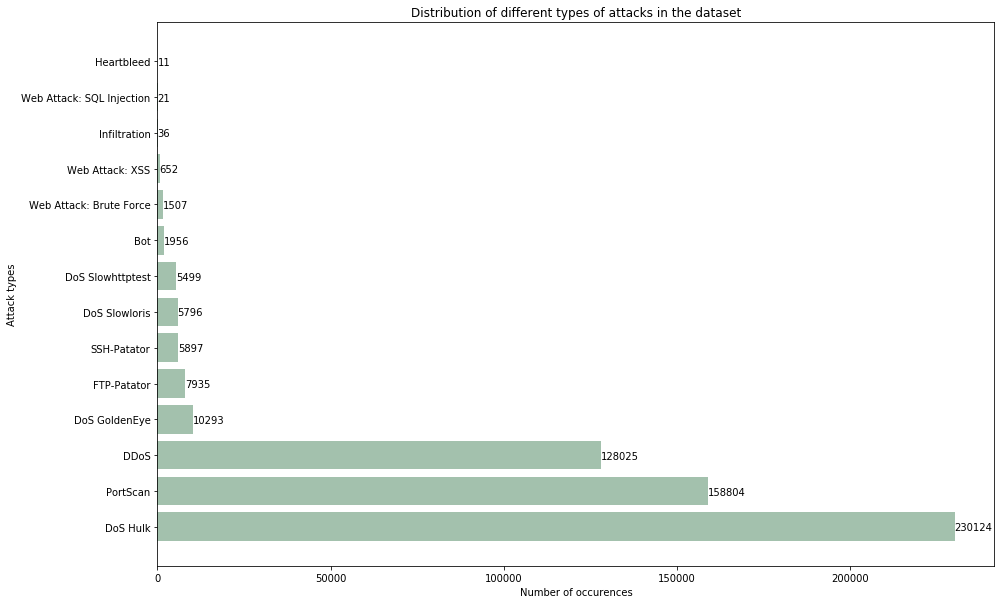

In [12]:
plt.figure(figsize=(15,10))

attack = ('DoS Hulk', 'PortScan', 'DDoS', 'DoS GoldenEye', 'FTP-Patator', 'SSH-Patator', 'DoS Slowloris',
          'DoS Slowhttptest', 'Bot', 'Web Attack: Brute Force', 'Web Attack: XSS', 'Infiltration', 'Web Attack: SQL Injection', 'Heartbleed')
y_pos = np.arange(len(attack)) 
amount = dataset['Label'].value_counts()[1:]
plt.barh(y_pos, amount, align='center', color='#a3c1ad' )
plt.yticks(y_pos, attack)
plt.title('Distribution of different types of attacks in the dataset')
plt.xlabel('Number of occurences')
plt.ylabel('Attack types')
for i, v in enumerate(amount):
    plt.text(v + 3, i-0.1 , str(v))
    
plt.show()

There are only 11, 21, and 36 instances of Heartbleed, SQL injection and infiltration respectively. So, we will drop these since there will not be sufficient trianing data. 
In addition, rename the web attacks to remove the unicode ?

In [13]:
dataset = dataset.replace(['Heartbleed', 'Web Attack � Sql Injection', 'Infiltration'], np.nan)
dataset = dataset.dropna()
dataset['Label'].value_counts()

BENIGN                      2271320
DoS Hulk                     230124
PortScan                     158804
DDoS                         128025
DoS GoldenEye                 10293
FTP-Patator                    7935
SSH-Patator                    5897
DoS slowloris                  5796
DoS Slowhttptest               5499
Bot                            1956
Web Attack � Brute Force       1507
Web Attack � XSS                652
Name: Label, dtype: int64

In [14]:
dataset.loc[dataset.Label == 'Web Attack � Brute Force', ['Label']] = 'Brute Force'
dataset.loc[dataset.Label == 'Web Attack � XSS', ['Label']] = 'XSS'

We will add a binary attack column - indicating a 0 if benign, or 1 if there was an attack. 

Furthermore, since there are several types of attacks, I propose a grouping of attacks, which should lead to a better accuracy and generalisation. 

In [15]:
dataset['Attack'] = np.where(dataset['Label'] == 'BENIGN', 0, 1)

In [16]:
attack_group = {'BENIGN': 'benign', 
                'DoS Hulk': 'dos',
                'PortScan': 'probe', 
                'DDoS': 'ddos',
                'DoS GoldenEye': 'dos', 
                'FTP-Patator': 'brute_force',
                'SSH-Patator': 'brute_force', 
                'DoS slowloris': 'dos', 
                'DoS Slowhttptest': 'dos',
                'Bot': 'botnet',
                'Brute Force': 'web_attack', 
                'XSS': 'web_attack'}
dataset['Label_Category'] = dataset['Label'].map(lambda x: attack_group[x])
dataset['Label_Category'].value_counts()

benign         2271320
dos             251712
probe           158804
ddos            128025
brute_force      13832
web_attack        2159
botnet            1956
Name: Label_Category, dtype: int64

Text(0.5, 1.0, 'Distribution of Attack Categories (Grouped)')

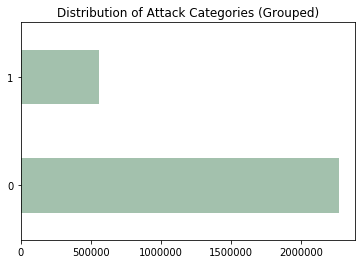

In [17]:
train_attacks = dataset['Attack'].value_counts()
train_attacks.plot(kind='barh', color='#a3c1ad')
plt.title('Distribution of Attack Categories (Grouped)')

Text(0.5, 1.0, 'Distribution of Attack Categories (Grouped)')

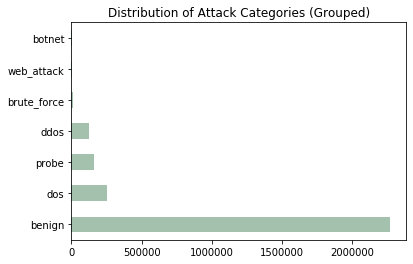

In [18]:
train_attacks = dataset['Label_Category'].value_counts()
train_attacks.plot(kind='barh', color='#a3c1ad')
plt.title('Distribution of Attack Categories (Grouped)')

Text(0.5, 1.0, 'Distribution of Attack Categories')

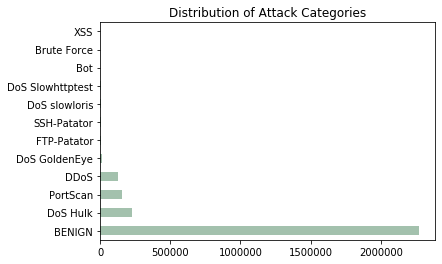

In [19]:
train_attacks = dataset['Label'].value_counts()
train_attacks.plot(kind='barh', color='#a3c1ad')
plt.title('Distribution of Attack Categories')

# Split Data

Split data using 60:20:20 ratio, for training, test and validation dataset. We stratify such that the proportions of attacks remain the same throughout the 3 sets. 

In [20]:
attacks = ['Label', 'Label_Category', 'Attack']
xs = dataset.drop(attacks, axis=1)
ys = dataset[attacks]
x_train, x_temp, y_train, y_temp = train_test_split(xs, ys, test_size=0.4, random_state=0, stratify=ys['Label'])
x_test, x_validate, y_test, y_validate = train_test_split(x_temp, y_temp, test_size=0.5, random_state=0, stratify=y_temp['Label'])

In [21]:
column_names = np.array(list(x_train))
to_drop = []
for x in column_names:
    size = x_train.groupby([x]).size()
    if (len(size.unique()) == 1):
        to_drop.append(x)
to_drop

['Bwd_PSH_Flags',
 'Bwd_URG_Flags',
 'Fwd_Avg_Bytes_Bulk',
 'Fwd_Avg_Packets_Bulk',
 'Fwd_Avg_Bulk_Rate',
 'Bwd_Avg_Bytes_Bulk',
 'Bwd_Avg_Packets_Bulk',
 'Bwd_Avg_Bulk_Rate']

Drop these because they only contain one value, and so are redundant as columns

In [22]:
x_train = x_train.drop(to_drop, axis=1)
x_validate = x_validate.drop(to_drop, axis=1)
x_test = x_test.drop(to_drop, axis=1)
dataset_copy = dataset.drop(to_drop, axis=1)

## Apply Normalisation
Using minmax normalisation 

In [23]:
min_max_scaler = MinMaxScaler().fit(x_train)
x_train = min_max_scaler.transform(x_train)
x_validate = min_max_scaler.transform(x_validate)
x_test = min_max_scaler.transform(x_test)
pd.Series(x_train.flatten()).describe()

count    1.170712e+08
mean     8.761696e-02
std      2.506980e-01
min      0.000000e+00
25%      0.000000e+00
50%      6.500000e-07
75%      6.410256e-03
max      1.000000e+00
dtype: float64

## Feature Selection
Use chi2 select k best
First, score all the features

In [24]:
features = SelectKBest(score_func=chi2, k=x_train.shape[1])
fit = features.fit(x_train, y_train.Label)
train_features = fit.transform(x_train)
test_features = fit.transform(x_test)

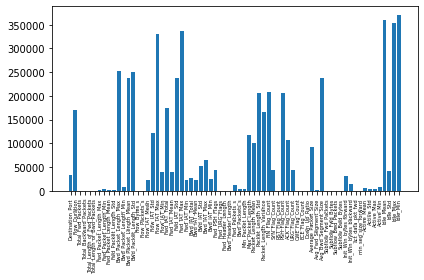

In [25]:
plt.bar([i for i in range(len(features.scores_))], features.scores_)
plt.xticks([i for i in range(len(features.scores_))], dataset_copy.columns)
plt.xticks(rotation=90, fontsize=5)
plt.tight_layout()
plt.savefig('features.png', dpi=300)

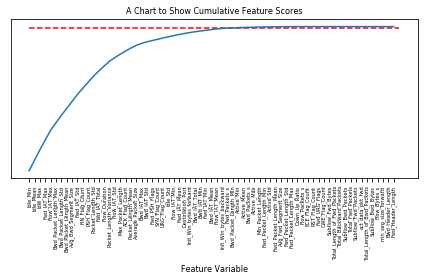

In [26]:
feature_importances = zip(dataset_copy.columns, features.scores_)
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

x_values = list(range(len(feature_importances)))

cumulative_importances = np.cumsum(sorted_importances)
plt.plot(x_values, cumulative_importances)

# Draw line at 99% of importance retained 
value99 = cumulative_importances[-1]*0.99

plt.hlines(y = value99, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
plt.xticks(x_values, sorted_features, rotation = 'vertical', fontsize=5)
plt.yticks([], [])
plt.xlabel('Feature Variable', fontsize=8)
plt.title('A Chart to Show Cumulative Feature Scores', fontsize=8)
#plt.figure(figsize=(500,200))
plt.tight_layout()
plt.savefig('cum_features.png', dpi=300)

We select 40 features. 99% of the information is contained in the first 40, so this is the cut off point

In [27]:
features = SelectKBest(score_func=chi2, k=40)
fit = features.fit(x_train, y_train.Label)
x_train = fit.transform(x_train)
x_test = fit.transform(x_test)
x_validate = fit.transform(x_validate)

Need to find out what are the new features that we need to collect

In [28]:
new_features = dataset_copy.columns[features.get_support(indices=True)]

In [29]:
new_features

Index(['Destination_Port', 'Flow_Duration', 'Bwd_Packet_Length_Max',
       'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean',
       'Bwd_Packet_Length_Std', 'Flow_IAT_Mean', 'Flow_IAT_Std',
       'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Total', 'Fwd_IAT_Mean',
       'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min', 'Bwd_IAT_Total',
       'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max', 'Bwd_IAT_Min',
       'Fwd_PSH_Flags', 'Fwd_Packets_s', 'Max_Packet_Length',
       'Packet_Length_Mean', 'Packet_Length_Std', 'Packet_Length_Variance',
       'FIN_Flag_Count', 'SYN_Flag_Count', 'PSH_Flag_Count', 'ACK_Flag_Count',
       'URG_Flag_Count', 'Average_Packet_Size', 'Avg_Bwd_Segment_Size',
       'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'Active_Min',
       'Idle_Mean', 'Idle_Std', 'Idle_Max', 'Idle_Min'],
      dtype='object')

In [30]:
attack = np.array(['BENIGN', 'Bot', 'Brute Force', 'DDoS', 'DoS GoldenEye', 'DoS Hulk', 'DoS Slowhttptest',
                   'DoS slowloris', 'FTP-Patator', 'PortScan', 'SSH-Patator', 'XSS'])
attack_groups = np.array(['benign', 'botnet', 'brute_force', 'ddos', 'dos', 'probe', 'web_attack'])

## 1. SVM 

Try our first algorithm - a support vector machine
    1. On all labels
    2. On grouped labels
    3. On binary labels

In [31]:
classifier = LinearSVC()

### All labels

In [127]:
start = time.time()
classifier.fit(x_train, y_train.Label)
end = time.time()
training_time = end - start

start = time.time()
y_predicted = classifier.predict(x_validate)
end = time.time()
predict_time = end  - start
print(training_time, predict_time)

confusion_svm_1 = pd.crosstab(y_validate.Label, y_predicted)
confusion_svm_1

453.01398611068726 0.19631695747375488


col_0,BENIGN,Bot,Brute Force,DDoS,DoS GoldenEye,DoS Hulk,DoS Slowhttptest,DoS slowloris,FTP-Patator,PortScan,XSS
Label,,,,,,,,,,,
BENIGN,440755,19,1,56,124,1469,211,8,0,11619,3
Bot,291,0,0,0,0,0,0,0,0,100,0
Brute Force,301,0,0,0,0,0,0,0,0,0,0
DDoS,4178,0,0,20934,1,487,0,0,0,5,0
DoS GoldenEye,685,0,0,0,1369,0,1,2,0,0,1
DoS Hulk,8817,14,0,222,108,36849,2,12,0,1,0
DoS Slowhttptest,308,0,0,18,0,0,751,23,0,0,0
DoS slowloris,586,0,0,0,0,10,13,547,0,3,0
FTP-Patator,797,0,0,0,0,0,0,0,790,0,0


In [128]:
precision, recall, fscore, support = score(y_validate.Label, y_predicted)

d = {'attack': attack, 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,attack,precision,recall,fscore
0,BENIGN,0.961229,0.970260,0.965723
1,Bot,0.000000,0.000000,0.000000
2,Brute Force,0.000000,0.000000,0.000000
3,DDoS,0.986057,0.817575,0.893947
4,DoS GoldenEye,0.852428,0.665209,0.747271
5,DoS Hulk,0.948885,0.800630,0.868476
6,DoS Slowhttptest,0.767894,0.682727,0.722810
7,DoS slowloris,0.914716,0.471959,0.622652
8,FTP-Patator,1.000000,0.497795,0.664703
9,PortScan,0.726947,0.983155,0.835858


In [129]:
precision_svm_1, recall_svm_1, fscore_svm_1, support = score(y_validate.Label, y_predicted, average='macro')
accuracy_svm_1 = accuracy_score(y_validate.Label, y_predicted)

### Grouped labels

In [130]:
start = time.time()
classifier.fit(x_train, y_train.Label_Category)
end = time.time()
training_time = end - start

start = time.time()
y_predicted = classifier.predict(x_validate)
end = time.time()
predict_time = end  - start
print(training_time, predict_time)

confusion_svm_2 = pd.crosstab(y_validate.Label_Category, y_predicted)
confusion_svm_2

343.225998878479 0.09940409660339355


col_0,benign,botnet,brute_force,ddos,dos,probe,web_attack
Label_Category,,,,,,,
benign,440552,24,0,54,2010,11619,6
botnet,291,0,0,0,0,100,0
brute_force,1957,0,794,0,15,1,0
ddos,4175,0,0,20571,854,5,0
dos,10455,40,0,294,39549,4,0
probe,505,0,0,0,24,31232,0
web_attack,431,0,0,0,0,0,0


In [131]:
precision, recall, fscore, support = score(y_validate.Label_Category, y_predicted)

d = {'attack': attack_groups, 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,benign,0.961136,0.969813,0.965455
1,botnet,0.000000,0.000000,0.000000
2,brute_force,1.000000,0.286953,0.445942
3,ddos,0.983364,0.803398,0.884318
4,dos,0.931617,0.785606,0.852404
5,probe,0.726985,0.983344,0.835952
6,web_attack,0.000000,0.000000,0.000000


In [132]:
precision_svm_2, recall_svm_2, fscore_svm_2, n = score(y_validate.Label_Category, y_predicted, average='macro')
accuracy_svm_2 = accuracy_score(y_validate.Label_Category, y_predicted)

### Binary Labels

In [133]:
start = time.time()
classifier.fit(x_train, y_train.Attack)
end = time.time()
training_time = end - start

start = time.time()
y_predicted = classifier.predict(x_validate)
end = time.time()
predict_time = end  - start
print(training_time, predict_time)
confusion_svm_3 = pd.crosstab(y_validate.Attack, y_predicted)
confusion_svm_3

121.44809889793396 0.03398299217224121


col_0,0,1
Attack,,
0,437550,16715
1,24741,86556


In [134]:
precision, recall, fscore, support = score(y_validate.Attack, y_predicted)
d = {'attack': [0,1], 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,0,0.946482,0.963204,0.954770
1,1,0.838144,0.777703,0.806793


In [135]:
precision_svm_3, recall_svm_3, fscore_svm_3, n = score(y_validate.Attack, y_predicted, average='macro')
accuracy_svm_3 = accuracy_score(y_validate.Attack, y_predicted)

### Results for SVM:

In [136]:
print('Support Vector Machine: Precision / Recall / Fscore / Accuracy')
print('All Labels:', precision_svm_1, recall_svm_1, fscore_svm_1,  accuracy_svm_1)
print('Groupued Labels:', precision_svm_2, recall_svm_2, fscore_svm_2, accuracy_svm_2)
print('Binary Labels:', precision_svm_3, recall_svm_3, fscore_svm_3, accuracy_svm_3)

Support Vector Machine: Precision / Recall / Fscore / Accuracy
All Labels: 0.5965129640062673 0.4907757713834196 0.5267867496144032 0.9428161722322221
Groupued Labels: 0.6575860130297377 0.5470163903531152 0.569152989098072 0.9418914283491465
Binary Labels: 0.8923130307182863 0.8704536000472447 0.8807814983275402 0.9266994600061532


## 2. Decision Tree

In [231]:
classifier = DecisionTreeClassifier(random_state = 0)

### All labels

In [232]:
start = time.time()
classifier.fit(x_train, y_train.Label)
end = time.time()
training_time = end - start

start = time.time()
y_predicted = classifier.predict(x_validate)
end = time.time()
predict_time = end  - start
print(training_time, predict_time)

confusion_dt_1 = pd.crosstab(y_validate.Label, y_predicted)
confusion_dt_1

105.93187499046326 0.7262368202209473


col_0,BENIGN,Bot,Brute Force,DDoS,DoS GoldenEye,DoS Hulk,DoS Slowhttptest,DoS slowloris,FTP-Patator,PortScan,SSH-Patator,XSS
Label,,,,,,,,,,,,
BENIGN,453896,73,2,11,4,79,10,8,0,179,1,2
Bot,71,320,0,0,0,0,0,0,0,0,0,0
Brute Force,2,0,224,0,0,0,0,1,0,1,0,73
DDoS,7,0,0,25596,0,1,1,0,0,0,0,0
DoS GoldenEye,5,0,0,0,2044,7,0,2,0,0,0,0
DoS Hulk,60,0,1,0,1,45960,0,0,0,3,0,0
DoS Slowhttptest,7,0,0,0,2,0,1083,8,0,0,0,0
DoS slowloris,1,0,0,0,0,0,9,1148,0,1,0,0
FTP-Patator,1,0,0,0,0,0,0,0,1586,0,0,0


In [235]:
precision, recall, fscore, support = score(y_validate.Label, y_predicted)
d = {'attack': attack, 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,BENIGN,0.999175,0.999188,0.999181
1,Bot,0.814249,0.818414,0.816327
2,Brute Force,0.739274,0.744186,0.741722
3,DDoS,0.999570,0.999649,0.999609
4,DoS GoldenEye,0.996587,0.993197,0.994889
5,DoS Hulk,0.998002,0.998588,0.998295
6,DoS Slowhttptest,0.981868,0.984545,0.983205
7,DoS slowloris,0.982877,0.990509,0.986678
8,FTP-Patator,0.999370,0.999370,0.999370
9,PortScan,0.994136,0.992853,0.993494


In [236]:
precision_dt_1, recall_dt_1, fscore_dt_1, n = score(y_validate.Label, y_predicted, average = 'macro')
accuracy_dt_1 = accuracy_score(y_validate.Label, y_predicted)

### Grouped Labels

In [237]:
start = time.time()
classifier.fit(x_train, y_train.Label_Category)
end = time.time()
training_time = end - start

start = time.time()
y_predicted = classifier.predict(x_validate)
end = time.time()
predict_time = end  - start
print(training_time, predict_time)

confusion_dt_2 = pd.crosstab(y_validate.Label_Category, y_predicted)
confusion_dt_2

100.00708293914795 0.22777891159057617


col_0,benign,botnet,brute_force,ddos,dos,probe,web_attack
Label_Category,,,,,,,
benign,453899,71,1,14,95,175,10
botnet,65,326,0,0,0,0,0
brute_force,1,0,2766,0,0,0,0
ddos,9,0,0,25596,0,0,0
dos,69,0,0,0,50267,5,1
probe,221,0,0,0,5,31533,2
web_attack,3,0,0,0,1,0,427


In [238]:
precision, recall, fscore, support = score(y_validate.Label_Category, y_predicted)

d = {'attack': attack_groups, 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,benign,0.999190,0.999194,0.999192
1,botnet,0.821159,0.833760,0.827411
2,brute_force,0.999639,0.999639,0.999639
3,ddos,0.999453,0.999649,0.999551
4,dos,0.997995,0.998510,0.998252
5,probe,0.994324,0.992821,0.993572
6,web_attack,0.970455,0.990719,0.980482


In [239]:
precision_dt_2, recall_dt_2, fscore_dt_2, n = score(y_validate.Label_Category, y_predicted, average = 'macro')
accuracy_dt_2 = accuracy_score(y_validate.Label_Category, y_predicted)

### Binary Labels

In [240]:
start = time.time()
classifier.fit(x_train, y_train.Attack)
end = time.time()
training_time = end - start

start = time.time()
y_predicted = classifier.predict(x_validate)
end = time.time()
predict_time = end  - start
print(training_time, predict_time)

confusion_dt_3 = pd.crosstab(y_validate.Attack, y_predicted)
confusion_dt_3

92.32936334609985 0.16121602058410645


col_0,0,1
Attack,,
0,453916,349
1,369,110928


In [241]:
precision, recall, fscore, support = score(y_validate.Attack, y_predicted)
d = {'attack': [0,1], 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,0,0.999188,0.999232,0.999210
1,1,0.996864,0.996685,0.996774


In [242]:
precision_dt_3, recall_dt_3, fscore_dt_3, n = score(y_validate.Attack, y_predicted, average = 'macro')
accuracy_dt_3 = accuracy_score(y_validate.Attack, y_predicted)

### Decision tree results

In [243]:
print('Decision Tree: Precision / Recall / Fscore / Accuracy')
print('All Labels:', precision_dt_1, recall_dt_1, fscore_dt_1, accuracy_dt_1)
print('Groupued Labels:', precision_dt_2, recall_dt_2, fscore_dt_2, accuracy_dt_2)
print('Binary Labels:', precision_dt_3, recall_dt_3, fscore_dt_3, accuracy_dt_3)

Decision Tree: Precision / Recall / Fscore / Accuracy
All Labels: 0.9081634383001905 0.9086888973262549 0.9084189640790116 0.9983344001188199
Groupued Labels: 0.9688877040659636 0.9734702614491766 0.9711570807064333 0.9986774217504005
Binary Labels: 0.9980257085469522 0.9979581363641041 0.9979919181892469 0.9987304663326037


## 3. Naive Bayes

In [148]:
classifier = MultinomialNB()

### Original labels

In [149]:
start = time.time()
classifier.fit(x_train, y_train.Label)
end = time.time()
training_time = end - start

start = time.time()
y_predicted = classifier.predict(x_validate)
end = time.time()
predict_time = end  - start
print(training_time, predict_time)

confusion_nb_1 = pd.crosstab(y_validate.Label, y_predicted)
confusion_nb_1

11.465129137039185 0.12616705894470215


col_0,BENIGN,DDoS,DoS GoldenEye,DoS Hulk,DoS Slowhttptest,DoS slowloris,PortScan
Label,,,,,,,
BENIGN,447618,226,14,1390,59,4655,303
Bot,388,3,0,0,0,0,0
Brute Force,301,0,0,0,0,0,0
DDoS,9471,12706,0,3428,0,0,0
DoS GoldenEye,1217,669,106,0,0,66,0
DoS Hulk,15354,2558,0,28113,0,0,0
DoS Slowhttptest,906,0,0,0,194,0,0
DoS slowloris,926,0,0,0,35,198,0
FTP-Patator,1587,0,0,0,0,0,0


In [150]:
precision, recall, fscore, support = score(y_validate.Label, y_predicted)
d = {'attack': attack, 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,attack,precision,recall,fscore
0,BENIGN,0.876308,0.985368,0.927643
1,Bot,0.000000,0.000000,0.000000
2,Brute Force,0.000000,0.000000,0.000000
3,DDoS,0.785533,0.496231,0.608234
4,DoS GoldenEye,0.883333,0.051506,0.097337
5,DoS Hulk,0.853694,0.610820,0.712118
6,DoS Slowhttptest,0.673611,0.176364,0.279539
7,DoS slowloris,0.040113,0.170837,0.064971
8,FTP-Patator,0.000000,0.000000,0.000000
9,PortScan,0.028846,0.000283,0.000561


In [151]:
precision_nb_1, recall_nb_1, fscore_nb_1, n = score(y_validate.Label, y_predicted, average = 'macro')
accuracy_nb_1 = accuracy_score(y_validate.Label, y_predicted)

### Grouped labels

In [152]:
start = time.time()
classifier.fit(x_train, y_train.Label_Category)
end = time.time()
training_time = end - start

start = time.time()
y_predicted = classifier.predict(x_validate)
end = time.time()
predict_time = end  - start
print(training_time, predict_time)

confusion_nb_2 = pd.crosstab(y_validate.Label_Category, y_predicted)
confusion_nb_2

7.065007209777832 0.11336398124694824


col_0,benign,ddos,dos,probe
Label_Category,,,,
benign,448265,226,5471,303
botnet,388,3,0,0
brute_force,2767,0,0,0
ddos,9471,12623,3511,0
dos,18513,3226,28603,0
probe,31739,13,0,9
web_attack,431,0,0,0


In [153]:
precision, recall, fscore, support = score(y_validate.Label_Category, y_predicted)
d = {'attack': attack_groups, 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,attack,precision,recall,fscore
0,benign,0.876247,0.986792,0.928240
1,botnet,0.000000,0.000000,0.000000
2,brute_force,0.000000,0.000000,0.000000
3,ddos,0.784476,0.492990,0.605478
4,dos,0.761022,0.568174,0.650608
5,probe,0.028846,0.000283,0.000561
6,web_attack,0.000000,0.000000,0.000000


In [154]:
precision_nb_2, recall_nb_2, fscore_nb_2, n = score(y_validate.Label_Category, y_predicted, average = 'macro')
accuracy_nb_2 = accuracy_score(y_validate.Label_Category, y_predicted)

### Binary Labels

In [155]:
start = time.time()
classifier.fit(x_train, y_train.Attack)
end = time.time()
training_time = end - start

start = time.time()
y_predicted = classifier.predict(x_validate)
end = time.time()
predict_time = end  - start
print(training_time, predict_time)

confusion_nb_3 = pd.crosstab(y_validate.Attack, y_predicted)
confusion_nb_3

0.5996789932250977 0.05989408493041992


col_0,0,1
Attack,,
0,443615,10650
1,62736,48561


In [156]:
precision, recall, fscore, support = score(y_validate.Attack, y_predicted)
d = {'attack': [0,1], 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,0,0.876102,0.976556,0.923605
1,1,0.820135,0.436319,0.569604


In [157]:
precision_nb_3, recall_nb_3, fscore_nb_3, n = score(y_validate.Attack, y_predicted, average = 'macro')
accuracy_nb_3 = accuracy_score(y_validate.Attack, y_predicted)

### Naive Bayes Results

In [158]:
print('Naive Bayes: Precision / Recall / Fscore / Accuracy')
print('All labels:', precision_nb_1, recall_nb_1, fscore_nb_1, accuracy_nb_1)
print('Grouped labels:', precision_nb_2, recall_nb_2, fscore_nb_2, accuracy_nb_2)
print('Binary labels:', precision_nb_3, recall_nb_3, fscore_nb_3, accuracy_nb_3)

Naive Bayes: Precision / Recall / Fscore / Accuracy
All labels: 0.34511992674625697 0.20761743591662676 0.22420028175606552 0.8645276733585354
Grouped labels: 0.3500843249521696 0.29260550848150363 0.31212663524995427 0.8655107662820345
Binary labels: 0.8481182638783868 0.7064372865069797 0.7466045211044006 0.8702423430145589


# 4. K Nearest Neighbours 

Find what the value of K is best 

In [ ]:
p_list = []
r_list = []
f_list = []

k_range = range(1, 51, 2)

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(x_train, y_train.Label)
    y_predicted = classifier.predict(x_validate)
    
    precision, recall, fscore, n = score(y_validate.Label, y_predicted, average = 'macro')

    p_list.append(precision)
    r_list.append(recall)
    f_list.append(fscore)
    
    print(k, precision, recall, fscore)

In [ ]:
plt.plot(k_range, p_list, label='Precision')
plt.plot(k_range, r_list, label='Recall')

plt.plot(k_range, f1_list, label='F1 Score')
plt.legend(loc='best')
plt.xlabel('K Value')
plt.ylabel('%')
plt.title('A chart to show Precision, Recall, and F1 Score for different K Values')
plt.savefig('knn_k_values.png')

### All labels with k=7

In [72]:
classifier = KNeighborsClassifier(n_neighbors = 7)
start = time.time()
classifier.fit(x_train, y_train.Label)
end = time.time()
training_time = end - start

start = time.time()
y_predicted = classifier.predict(x_validate)
end = time.time()
predict_time = end  - start
print(training_time, predict_time)

precision_knn_1, recall_knn_1, fscore_knn_1, n = score(y_validate.Label, y_predicted, average = 'macro')
accuracy_knn_1=  accuracy_score(y_validate.Label, y_predicted)

confusion_knn_1 = pd.crosstab(y_validate.Label, y_predicted)
confusion_knn_1

2306.966103076935 1963.9200639724731


col_0,BENIGN,Bot,Brute Force,DDoS,DoS GoldenEye,DoS Hulk,DoS Slowhttptest,DoS slowloris,FTP-Patator,PortScan,SSH-Patator,XSS
Label,,,,,,,,,,,,
BENIGN,451806,88,2,34,15,150,27,4,5,2122,12,0
Bot,126,265,0,0,0,0,0,0,0,0,0,0
Brute Force,2,0,246,0,0,0,0,0,0,0,0,53
DDoS,12,0,0,25466,4,123,0,0,0,0,0,0
DoS GoldenEye,16,0,0,2,2034,4,2,0,0,0,0,0
DoS Hulk,90,0,1,32,6,45894,0,0,0,2,0,0
DoS Slowhttptest,6,0,0,0,0,0,1092,2,0,0,0,0
DoS slowloris,12,0,0,0,0,0,4,1142,1,0,0,0
FTP-Patator,3,0,0,0,0,0,0,2,1581,0,1,0


In [66]:
precision, recall, fscore, support = score(y_validate.Label, y_predicted)
d = {'attack': attack, 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,BENIGN,0.996728,0.994587,0.995656
1,Bot,0.750708,0.677749,0.712366
2,Brute Force,0.723529,0.817276,0.767551
3,DDoS,0.997337,0.994571,0.995952
4,DoS GoldenEye,0.987858,0.988338,0.988098
5,DoS Hulk,0.993785,0.997154,0.995467
6,DoS Slowhttptest,0.970667,0.992727,0.981573
7,DoS slowloris,0.993043,0.985332,0.989173
8,FTP-Patator,0.994965,0.996219,0.995592
9,PortScan,0.934990,0.961809,0.948210


### grouped labels, k=7

In [67]:
classifier = KNeighborsClassifier(n_neighbors = 7)
start = time.time()
classifier.fit(x_train, y_train.Label_Category)
end = time.time()
training_time = end - start

start = time.time()
y_predicted = classifier.predict(x_validate)
end = time.time()
predict_time = end  - start
print(training_time, predict_time)

precision_knn_2, recall_knn_2, fscore_knn_2, n = score(y_validate.Label_Category, y_predicted, average = 'macro')
accuracy_knn_2 =  accuracy_score(y_validate.Label_Category, y_predicted)

confusion_knn_2 = pd.crosstab(y_validate.Label_Category, y_predicted)
confusion_knn_2

2507.444155931473 2064.9058079719543


col_0,benign,botnet,brute_force,ddos,dos,probe,web_attack
Label_Category,,,,,,,
benign,451800,88,17,34,202,2122,2
botnet,126,265,0,0,0,0,0
brute_force,14,0,2749,0,4,0,0
ddos,12,0,0,25466,127,0,0
dos,120,0,1,34,50184,2,1
probe,1203,0,0,0,8,30548,2
web_attack,4,0,0,0,0,0,427


In [68]:
precision, recall, fscore, support = score(y_validate.Label_Category, y_predicted)
d = {'attack': attack_groups, 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,benign,0.996737,0.994574,0.995654
1,botnet,0.750708,0.677749,0.712366
2,brute_force,0.993495,0.993495,0.993495
3,ddos,0.997337,0.994571,0.995952
4,dos,0.993251,0.996861,0.995053
5,probe,0.934990,0.961809,0.948210
6,web_attack,0.988426,0.990719,0.989571


### binary labels, k=7

In [69]:
classifier = KNeighborsClassifier(n_neighbors = 7)
start = time.time()
classifier.fit(x_train, y_train.Attack)
end = time.time()
training_time = end - start

start = time.time()
y_predicted = classifier.predict(x_validate)
end = time.time()
predict_time = end  - start
print(training_time, predict_time)

precision_knn_3, recall_knn_3, fscore_knn_3, n = score(y_validate.Attack, y_predicted, average = 'macro')
accuracy_knn_3 =  accuracy_score(y_validate.Attack, y_predicted)

confusion_knn_3 = pd.crosstab(y_validate.Attack, y_predicted)
confusion_knn_3

2457.469139814377 2008.6706459522247


col_0,0,1
Attack,,
0,451794,2471
1,1478,109819


In [70]:
precision, recall, fscore, support = score(y_validate.Attack, y_predicted)
d = {'attack': [0,1], 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,0,0.996739,0.99456,0.995649
1,1,0.977994,0.98672,0.982338


### KNN Results

In [73]:
print('KNN: Precision / Recall / Fscore / Accuracy')
print('All Labels:', precision_knn_1, recall_knn_1, fscore_knn_1, accuracy_knn_1)
print('Groupued Labels:', precision_knn_2, recall_knn_2, fscore_knn_2, accuracy_knn_2)
print('Binary Labels:', precision_knn_3, recall_knn_3, fscore_knn_3, accuracy_knn_3)

KNN: Precision / Recall / Fscore / Accuracy
All Labels: 0.8963741251470352 0.8910875528672011 0.8924261821796824 0.9924252336613846
Groupued Labels: 0.9507062807952753 0.9442540539135168 0.9471858125286714 0.9927099062525417
Binary Labels: 0.9873668716531467 0.9906403304353256 0.9889933168036794 0.9930175648293202


## 5. K Means Cluster

In [159]:
colors = ['gray', 'turquoise', 'yellow', 'red', 
          'purple', 'black', 'blue', 'green',
         'orangered', 'pink', 'cyan', 'maroon']

### All labels


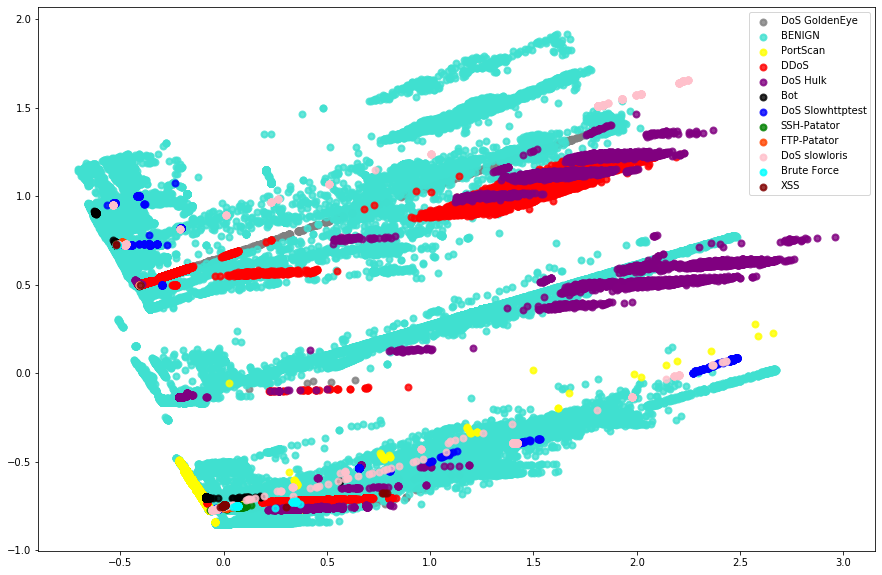

In [163]:
#Use PCA to remove dimensionality so we can visualise dataset in 2D
pca = PCA(n_components=40)
x_validate_pca_cont = pca.fit_transform(x_validate)

plt.figure(figsize=(15,10))
for color, l in zip(colors, y_validate.Label.unique()):
    plt.scatter(x_validate_pca_cont[y_validate.Label == l, 0],
                x_validate_pca_cont[y_validate.Label == l, 1],
               color = color, alpha=0.8, lw=2, label = l)
plt.legend(loc='best', shadow=False, scatterpoints=1)    
plt.show()

84.50838494300842 0.2103137969970703


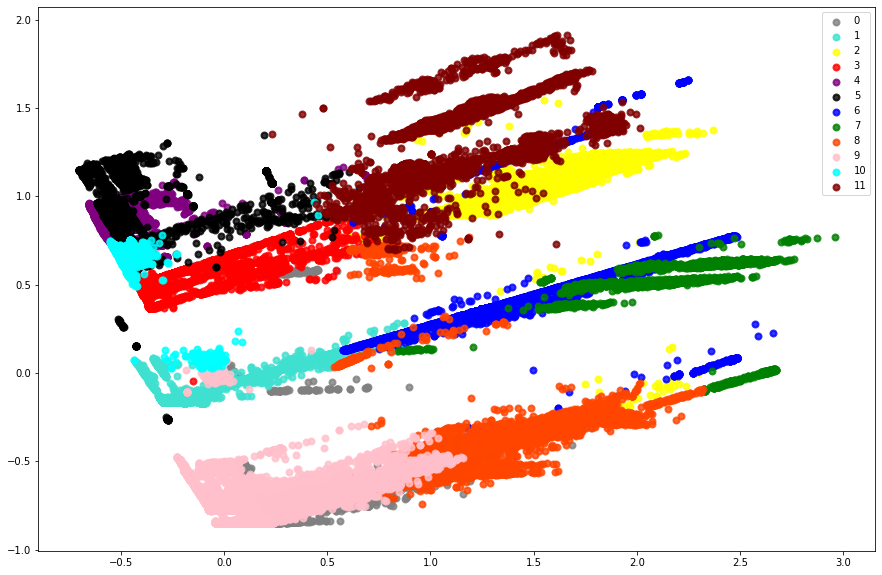

Predicted,0,1,2,3,4,5,6,7,8,9,10,11
Actual,,,,,,,,,,,,
BENIGN,2939,200212,131,28099,48945,22094,6314,151,34010,81328,24970,5072
Bot,3,0,0,3,151,0,0,0,1,233,0,0
Brute Force,1,0,0,0,28,0,0,0,0,272,0,0
DDoS,11784,0,4216,9601,0,0,0,0,0,4,0,0
DoS GoldenEye,1010,0,61,340,13,0,151,0,7,476,0,0
DoS Hulk,2796,1652,17937,13399,39,0,10,10148,0,38,0,6
DoS Slowhttptest,0,0,0,18,56,191,194,0,46,595,0,0
DoS slowloris,0,0,0,1,14,160,214,0,363,400,0,7
FTP-Patator,0,0,0,4,2,791,0,0,0,790,0,0


In [164]:
start = time.time()
kmeans = KMeans(n_clusters = 12, random_state = 17).fit(x_train)
y_kmeans = kmeans.labels_
end = time.time()
training_time = end - start


start = time.time()
y_predicted = kmeans.predict(x_validate)
end = time.time()
predict_time = end  - start
print(training_time, predict_time)

x_validate_pca_cont = pca.fit_transform(x_validate)

plt.figure(figsize=(15,10))
for color, l in zip(colors, np.unique(y_predicted)):
    plt.scatter(x_validate_pca_cont[y_predicted == l, 0],
                x_validate_pca_cont[y_predicted == l, 1],
               color = color, alpha=0.8, lw=2, label = l)
plt.legend(loc='best', shadow=False, scatterpoints=1)    
plt.show()

cluster_df = pd.DataFrame({'Predicted': y_predicted, 'Actual': y_validate.Label})
pd.crosstab(cluster_df.Actual, cluster_df.Predicted)

### Labled Grouped:

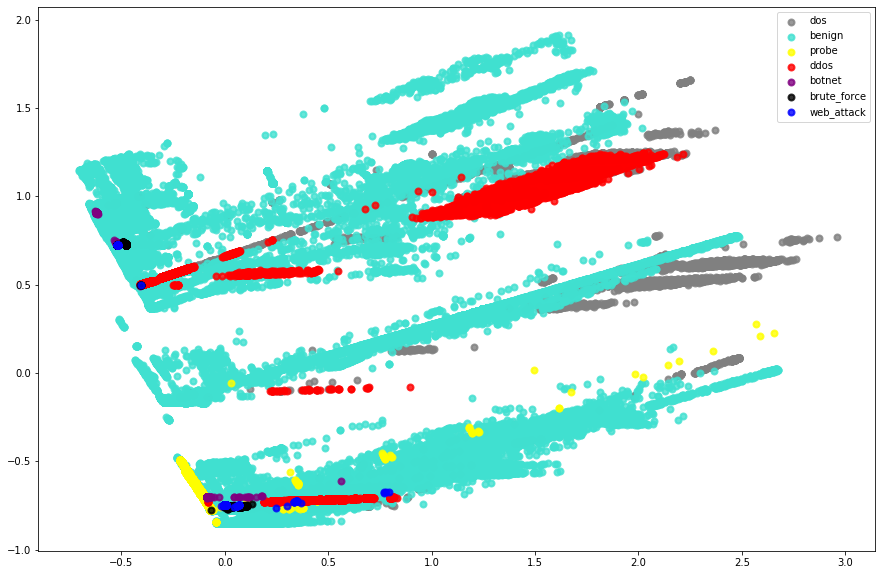

In [167]:
#Use PCA to remove dimensionality so we can visualise dataset in 2D
pca = PCA(n_components=40)
x_validate_pca_cont = pca.fit_transform(x_validate)

plt.figure(figsize=(15,10))
for color, l in zip(colors, y_validate.Label_Category.unique()):
    plt.scatter(x_validate_pca_cont[y_validate.Label_Category == l, 0],
                x_validate_pca_cont[y_validate.Label_Category == l, 1],
               color = color, alpha=0.8, lw=2, label = l)
plt.legend(loc='best', shadow=False, scatterpoints=1)    
plt.show()

47.64226818084717 0.1977989673614502


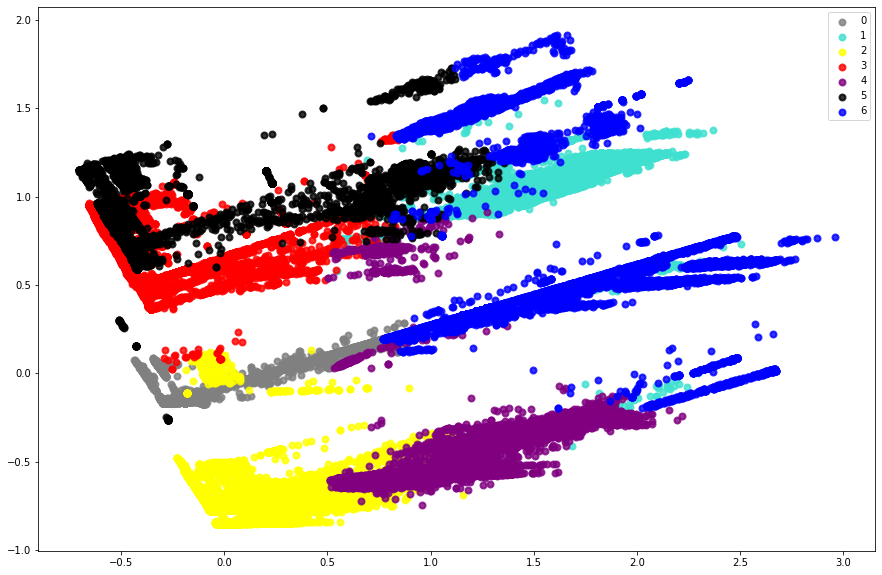

Predicted,0,1,2,3,4,5,6
Actual,,,,,,,
benign,200622,153,84357,101962,34051,24325,8795
botnet,0,0,236,154,1,0,0
brute_force,0,0,1366,606,0,795,0
ddos,0,4218,11675,9712,0,0,0
dos,1656,18399,5309,13839,407,358,10374
probe,1,0,31727,12,9,0,12
web_attack,0,0,396,31,4,0,0


In [168]:
start = time.time()
kmeans = KMeans(n_clusters = 7, random_state = 17).fit(x_train)
y_kmeans = kmeans.labels_
end = time.time()
training_time = end - start


start = time.time()
y_predicted = kmeans.predict(x_validate)
end = time.time()
predict_time = end  - start
print(training_time, predict_time)

x_validate_pca_cont = pca.fit_transform(x_validate)

plt.figure(figsize=(15,10))
for color, l in zip(colors, np.unique(y_predicted)):
    plt.scatter(x_validate_pca_cont[y_predicted == l, 0],
                x_validate_pca_cont[y_predicted == l, 1],
               color = color, alpha=0.8, lw=2, label = l)
plt.legend(loc='best', shadow=False, scatterpoints=1)    
plt.show()

cluster_df = pd.DataFrame({'Predicted': y_predicted, 'Actual': y_validate.Label_Category})
pd.crosstab(cluster_df.Actual, cluster_df.Predicted)

### Binary Labels

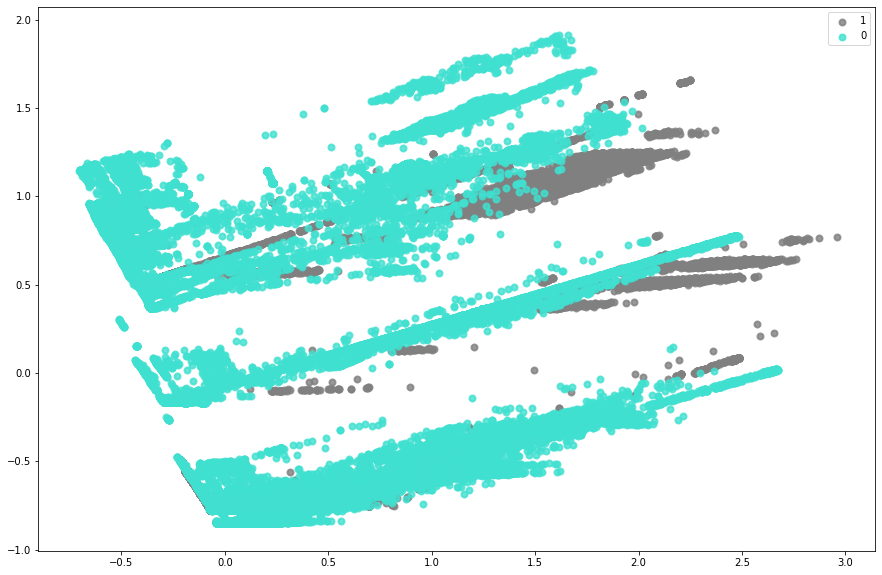

In [169]:
#Use PCA to remove dimensionality so we can visualise dataset in 2D
pca = PCA(n_components=40)
x_validate_pca_cont = pca.fit_transform(x_validate)

plt.figure(figsize=(15,10))
for color, l in zip(colors, y_validate.Attack.unique()):
    plt.scatter(x_validate_pca_cont[y_validate.Attack == l, 0],
                x_validate_pca_cont[y_validate.Attack == l, 1],
               color = color, alpha=0.8, lw=2, label = l)
plt.legend(loc='best', shadow=False, scatterpoints=1)    
plt.show()

25.979379177093506 0.1752021312713623


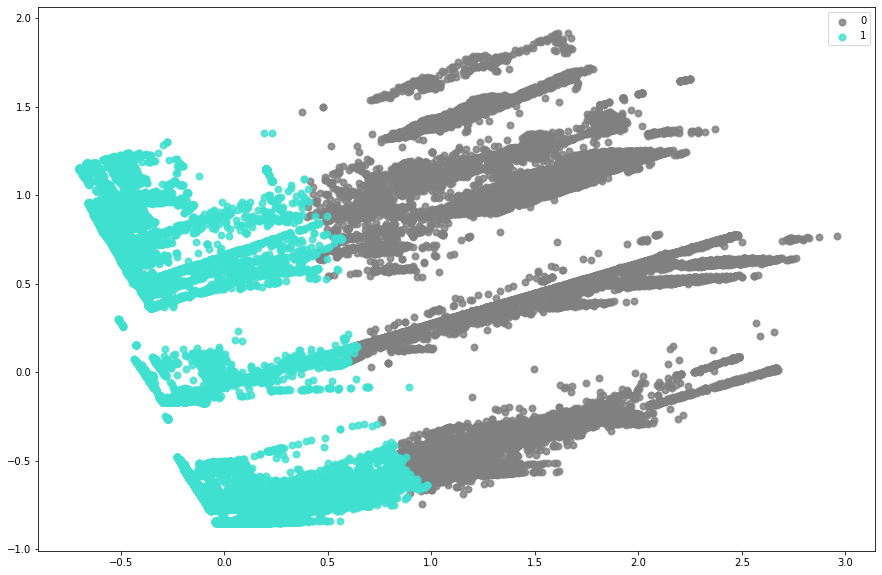

Predicted,0,1
Actual,,
0,38857,415408
1,33468,77829


In [170]:
start = time.time()
kmeans = KMeans(n_clusters = 2, random_state = 17).fit(x_train)
y_kmeans = kmeans.labels_
end = time.time()
training_time = end - start


start = time.time()
y_predicted = kmeans.predict(x_validate)
end = time.time()
predict_time = end  - start
print(training_time, predict_time)

x_validate_pca_cont = pca.fit_transform(x_validate)

plt.figure(figsize=(15,10))
for color, l in zip(colors, np.unique(y_predicted)):
    plt.scatter(x_validate_pca_cont[y_predicted == l, 0],
                x_validate_pca_cont[y_predicted == l, 1],
               color = color, alpha=0.8, lw=2, label = l)
plt.legend(loc='best', shadow=False, scatterpoints=1)    
plt.show()

cluster_df = pd.DataFrame({'Predicted': y_predicted, 'Actual': y_validate.Attack})
pd.crosstab(cluster_df.Actual, cluster_df.Predicted)

## 6. Random Forest 

Due to the success of decision tree, try ensemble method - random forest

In [244]:
classifier =  RandomForestClassifier()

### All labels

In [245]:
start = time.time()
classifier.fit(x_train, y_train.Label)
end = time.time()
training_time = end - start

start = time.time()
y_predicted = classifier.predict(x_validate)
end = time.time()
predict_time = end  - start
print(training_time, predict_time)

confusion_rf_1 = pd.crosstab(y_validate.Label, y_predicted)
confusion_rf_1

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


77.36000728607178 0.9905002117156982


col_0,BENIGN,Bot,Brute Force,DDoS,DoS GoldenEye,DoS Hulk,DoS Slowhttptest,DoS slowloris,FTP-Patator,PortScan,SSH-Patator,XSS
Label,,,,,,,,,,,,
BENIGN,453761,50,0,0,2,274,3,0,1,174,0,0
Bot,77,314,0,0,0,0,0,0,0,0,0,0
Brute Force,2,0,230,0,0,0,0,0,0,0,0,69
DDoS,10,0,0,25595,0,0,0,0,0,0,0,0
DoS GoldenEye,8,0,0,0,2042,6,2,0,0,0,0,0
DoS Hulk,21,0,1,2,1,45999,0,0,0,1,0,0
DoS Slowhttptest,7,0,0,0,0,0,1091,2,0,0,0,0
DoS slowloris,3,0,1,0,0,0,6,1149,0,0,0,0
FTP-Patator,3,0,0,0,0,0,0,0,1584,0,0,0


In [246]:
precision, recall, fscore, support = score(y_validate.Label, y_predicted)
d = {'attack': attack, 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,BENIGN,0.999687,0.998891,0.999289
1,Bot,0.862637,0.803069,0.831788
2,Brute Force,0.709877,0.764120,0.736000
3,DDoS,0.999922,0.999609,0.999766
4,DoS GoldenEye,0.998533,0.992225,0.995369
5,DoS Hulk,0.993864,0.999435,0.996642
6,DoS Slowhttptest,0.990018,0.991818,0.990917
7,DoS slowloris,0.998262,0.991372,0.994805
8,FTP-Patator,0.999369,0.998110,0.998739
9,PortScan,0.994519,0.999717,0.997111


In [247]:
precision_rf_1, recall_rf_1, fscore_rf_1, n = score(y_validate.Label, y_predicted, average = 'macro')
accuracy_rf_1 = accuracy_score(y_validate.Label, y_predicted)

### Grouped Labels

In [248]:
start = time.time()
classifier.fit(x_train, y_train.Label_Category)
end = time.time()
training_time = end - start

start = time.time()
y_predicted = classifier.predict(x_validate)
end = time.time()
predict_time = end  - start
print(training_time, predict_time)

confusion_rf_2 = pd.crosstab(y_validate.Label_Category, y_predicted)
confusion_rf_2

78.26494002342224 0.8967947959899902


col_0,benign,botnet,brute_force,ddos,dos,probe,web_attack
Label_Category,,,,,,,
benign,453905,41,0,0,144,175,0
botnet,86,305,0,0,0,0,0
brute_force,3,0,2764,0,0,0,0
ddos,11,0,0,25594,0,0,0
dos,30,0,0,0,50309,2,1
probe,3,0,0,2,5,31749,2
web_attack,7,0,0,0,0,0,424


In [249]:
precision, recall, fscore, support = score(y_validate.Label_Category, y_predicted)
d = {'attack': attack_groups, 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,benign,0.999692,0.999208,0.999450
1,botnet,0.881503,0.780051,0.827680
2,brute_force,1.000000,0.998916,0.999458
3,ddos,0.999922,0.999570,0.999746
4,dos,0.997047,0.999344,0.998194
5,probe,0.994456,0.999622,0.997032
6,web_attack,0.992974,0.983759,0.988345


In [250]:
precision_rf_2, recall_rf_2, fscore_rf_2, n = score(y_validate.Label_Category, y_predicted, average = 'macro')
accuracy_rf_2 = accuracy_score(y_validate.Label_Category, y_predicted)

### Binary Labels

In [251]:
start = time.time()
classifier.fit(x_train, y_train.Attack)
end = time.time()
training_time = end - start

start = time.time()
y_predicted = classifier.predict(x_validate)
end = time.time()
predict_time = end  - start
print(training_time, predict_time)

confusion_rf_3 = pd.crosstab(y_validate.Attack, y_predicted)
confusion_rf_3

70.18696808815002 0.6450691223144531


col_0,0,1
Attack,,
0,453890,375
1,249,111048


In [252]:
precision, recall, fscore, support = score(y_validate.Attack, y_predicted)
d = {'attack': [0,1], 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,0,0.999452,0.999174,0.999313
1,1,0.996634,0.997763,0.997198


In [253]:
precision_rf_3, recall_rf_3, fscore_rf_3, n = score(y_validate.Attack, y_predicted, average = 'macro')
accuracy_rf_3 = accuracy_score(y_validate.Attack, y_predicted)

### Random forest results

In [254]:
print('Random Forrest: Precision / Recall / FScore / Accuracy')
print('All labels:', precision_rf_1, recall_rf_1, fscore_rf_1, accuracy_rf_1)
print('Grouped labels:', precision_rf_2, recall_rf_2, fscore_rf_2, accuracy_rf_2)
print('Binary labels:', precision_rf_3, recall_rf_3, fscore_rf_3,accuracy_rf_3)

Random Forrest: Precision / Recall / FScore / Accuracy
All labels: 0.9077068772911527 0.9014913450347017 0.9041760974675533 0.9985253606147514
Grouped labels: 0.9807990901037212 0.9657814591692369 0.9728435436488378 0.9990947057970656
Binary labels: 0.9980430784129006 0.998468616795907 0.9982556784130228 0.9988966726901737


# Final Label Grouping:

In [48]:
attack_group = {'BENIGN': 'Benign', 
                'DoS Hulk': 'DoS',
                'PortScan': 'Probe', 
                'DDoS': 'DDoS',
                'DoS GoldenEye': 'DoS', 
                'FTP-Patator': 'FTP-Patator',
                'SSH-Patator': 'SSH-Patator', 
                'DoS slowloris': 'DoS', 
                'DoS Slowhttptest': 'DoS',
                'Bot': 'Botnet',
                'Brute Force': 'Web Attack', 
                'XSS': 'Web Attack'}
attacks = np.array(['Benign', 'Botnet', 'DDoS', 'DoS', 'FTP-Patator', 'Probe', 'SSH-Patator', 'Web Attack'])
y_train['New_Label'] = y_train.Label.map(lambda x: attack_group[x])
y_test['New_Label'] = y_test.Label.map(lambda x: attack_group[x])
y_validate['New_Label'] = y_validate.Label.map(lambda x: attack_group[x])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

# Optimising

Find the number of estimators value we should use

In [ ]:
n_estimators = [25, 50, 100, 200, 400, 800, 1600]
results = []
time_results = []

In [ ]:
for estimator in n_estimators: 
    classifier =  RandomForestClassifier(n_estimators=50)
    classifier.fit(x_train, y_train.New_Label)
    
    start = time.time()
    y_pred = classifier.predict(x_validate)
    end = time.time()
    
    p, r, f1, n = score(y_train.New_Label, y_pred, average = 'macro')
    print('result:' estimator, p, r, f1)
    results.append(f1)
    time_results.append(end-start)
    

In [ ]:
plt.plot(n_estimators, time_results)
plt.xlabel('n_estimators')
plt.ylabel('Classification Time (s)')
plt.title('How n_estimators value changes classification time')
plt.savefig('n_estimators-time.png')

In [ ]:
plt.plot(n_estimators, results)
plt.xlabel('n_estimators')
plt.ylabel('F1 Score')
plt.title('How n_estimators value changes F1 score for the validation dataset')
plt.savefig('n_estimators.png')

Using n_estimators = 50, use random search to find the values the other parameters should take

In [43]:
from sklearn.model_selection import RandomizedSearchCV

max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 200, num = 10)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': [50],
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [44]:
# Use the random grid to search for best hyperparameters

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train, y_train['New_Label'])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 26.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 130.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 262.3min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [45]:
rf_random.best_params_

{'n_estimators': 50,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 73,
 'bootstrap': True}

Test this:

In [46]:
classifier =  RandomForestClassifier(n_estimators=50, 
                                     max_depth=73, 
                                     min_samples_split=5, 
                                     min_samples_leaf=1, 
                                     max_features='auto', 
                                     bootstrap=True
)
start = time.time()
classifier.fit(x_train, y_train.New_Label)
end = time.time()
training_time = end - start

start = time.time()
y_predicted = classifier.predict(x_validate)
end = time.time()
predict_time = end  - start
print(training_time, predict_time)

confusion_rf = pd.crosstab(y_validate.New_Label, y_predicted)
confusion_rf

364.9625520706177 3.243964195251465


col_0,Benign,Botnet,DDoS,DoS,FTP-Patator,Probe,SSH-Patator,Web Attack
New_Label,,,,,,,,
Benign,453902,41,0,145,1,176,0,0
Botnet,201,190,0,0,0,0,0,0
DDoS,10,0,25595,0,0,0,0,0
DoS,24,0,0,50315,0,2,0,1
FTP-Patator,2,0,0,0,1585,0,0,0
Probe,2,0,0,5,0,31752,0,2
SSH-Patator,1,0,0,0,0,0,1179,0
Web Attack,6,0,0,0,0,0,0,425


In [50]:
precision, recall, fscore, support = score(y_validate.New_Label, y_predicted)
d = {'attack': attacks, 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,Benign,0.999458,0.999201,0.999330
1,Botnet,0.822511,0.485934,0.610932
2,DDoS,1.000000,0.999609,0.999805
3,DoS,0.997028,0.999464,0.998244
4,FTP-Patator,0.999369,0.998740,0.999055
5,Probe,0.994425,0.999717,0.997064
6,SSH-Patator,1.000000,0.999153,0.999576
7,Web Attack,0.992991,0.986079,0.989523


In [51]:
precision, recall, fscore, n = score(y_validate.New_Label, y_predicted, average = 'macro')
accuracy = accuracy_score(y_validate.New_Label, y_predicted)
precision, recall, fscore, accuracy

(0.9757227792911677,
 0.9334869191784891,
 0.9491910246640436,
 0.9989055134538742)

# Final

Peform random forest, using the new attack groupings and parameters, on the dataset held out for testing

In [58]:
classifier =  RandomForestClassifier(n_estimators=50, 
                                     max_depth=73, 
                                     min_samples_split=5, 
                                     min_samples_leaf=1, 
                                     max_features='auto', 
                                     bootstrap=True
)

In [59]:
start = time.time()
classifier.fit(x_train, y_train.New_Label)
end = time.time()
training_time = end - start

start = time.time()
y_predicted = classifier.predict(x_test)
end = time.time()
predict_time = end  - start
print(training_time, predict_time)

confusion = pd.crosstab(y_test.New_Label, y_predicted)
precision, recall, fscore, n = score(y_test.New_Label, y_predicted, average = 'macro')
accuracy = accuracy_score(y_test.New_Label, y_predicted)

381.9482169151306 2.8397529125213623


In [60]:
confusion

col_0,Benign,Botnet,DDoS,DoS,FTP-Patator,Probe,SSH-Patator,Web Attack
New_Label,,,,,,,,
Benign,453874,46,2,153,0,189,0,0
Botnet,96,295,0,0,0,0,0,0
DDoS,16,0,25589,0,0,0,0,0
DoS,18,0,0,50324,0,0,0,0
FTP-Patator,2,0,0,0,1585,0,0,0
Probe,2,0,0,3,0,31753,0,3
SSH-Patator,2,0,0,0,0,0,1177,0
Web Attack,11,0,0,1,0,0,0,421


In [61]:
precision, recall, fscore, accuracy

(0.9810747732519696,
 0.9652140800061485,
 0.9726571991469493,
 0.9990381249093822)

Text(0.5, 1, 'Confusion Matrix for Final Results')

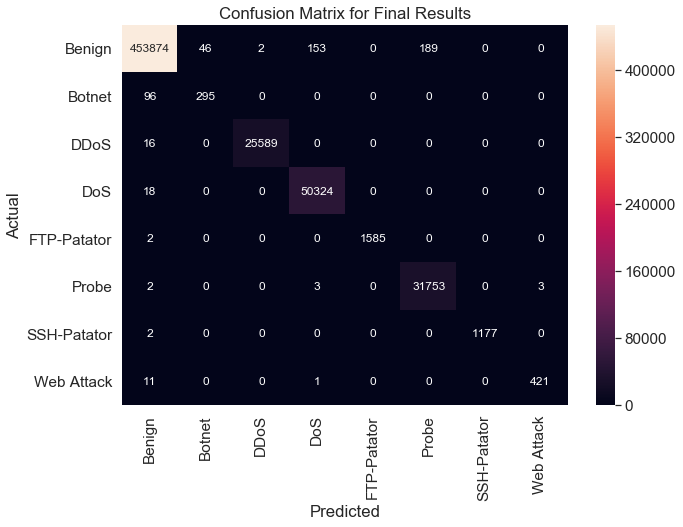

In [62]:
plt.figure(figsize = (10,7))
seaborn.set(font_scale=1.4)
ax = seaborn.heatmap(confusion, annot=True, annot_kws={"size": 12}, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Final Results')

In [63]:
precision, recall, fscore, support = score(y_test.New_Label, y_predicted)
d = {'attack': attacks, 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,Benign,0.999676,0.999141,0.999409
1,Botnet,0.865103,0.754476,0.806011
2,DDoS,0.999922,0.999375,0.999648
3,DoS,0.996890,0.999642,0.998264
4,FTP-Patator,1.000000,0.998740,0.999369
5,Probe,0.994083,0.999748,0.996908
6,SSH-Patator,1.000000,0.998304,0.999151
7,Web Attack,0.992925,0.972286,0.982497


% of the training dataset each label took

In [64]:
y_train['New_Label'].value_counts()/len(y_train)*100

Benign         80.320849
DoS             8.901363
Probe           5.615778
DDoS            4.527360
FTP-Patator     0.280606
SSH-Patator     0.208524
Web Attack      0.076325
Botnet          0.069194
Name: New_Label, dtype: float64